1. 将各感情各自组成一个文件
2. 删除多余的符号 eg: !!!-->!
3. 数据去重

In [13]:
import os
import re
import json
import codecs
import pandas as pd
import random
from config import Config
import jieba

In [2]:
emo_dict = {'null': 0, 'like': 1, 'sad': 2, 'disgust': 3, 'angry': 4, 'happy': 5}

In [3]:
def select_data(data_path: str, result_path: str, count: int):
    """随机选取指定数目的数据"""
    data = codecs.open(data_path,  encoding=Config.encoding, errors='replace')
    result = codecs.open(result_path, 'w', encoding=Config.encoding)

    data_list = data.readlines()  # 读取数据
    random.shuffle(data_list)   # 打乱数据

    # 选取数量为count的数据写入result_path
    if len(data) < count:
        count = len(data)
    for i in range(count): # 20w
        result.write(data_list[i])

    result.close()
    data.close()

In [15]:
def regular(file_name):
    """
    句子规范化，主要是对原始语料的句子进行一些标点符号的统一处理
    """
    file = codecs.open(file_name, encoding=Config.encoding)
    sen = []
    for index, line in enumerate(file):
        line = re.sub(r'…{1,100}', '…', line)
        line = re.sub(r'\.{3,100}', '…', line)
        line = re.sub(r'···{2,100}', '…', line)
        line = re.sub(r'\.{1,100}', '。', line)
        line = re.sub(r'。{1,100}', '。', line)
        line = re.sub(r'？{1,100}', '？', line)
        line = re.sub(r'!{1,100}', '！', line)
        line = re.sub(r'！{1,100}', '！', line)
        line = re.sub(r'~{1,100}', '～', line)
        line = re.sub(r'～{1,100}', '～', line)
        line = re.sub(r'\d*\.\d+|\d+', '1', line)  # 将所有数字都替换成1
        sen.append(line)
    file.close()

    file = codecs.open(file_name, "w", encoding=Config.encoding)
    for line in sen:
        file.write(line)
    file.close()

In [16]:
def file_remove_same(data_path):
    """数据去重"""
    file = codecs.open(data_path, encoding=Config.encoding, errors='replace')
    data = [item.strip() for item in file.readlines()]  # 针对最后一行没有换行符，与其他它行重复的情况
    file.close()

    result = codecs.open(data_path, 'w', encoding=Config.encoding)
    new_data = list(set(data))
    print(f"{len(data)} --> {len(new_data)}")
    result.writelines([item + '\n' for item in new_data if item])  # 针对去除文件中有多行空行的情况
    result.close()

In [17]:
def qa_process(pairs, result, emotion_type):
    """处理[[sentence,emotion],[],...]"""

    for pair in pairs:
        # print(pair)
        sentence, emotion = pair[0], pair[1]  # 句子，情感
        if emotion != emotion_type:  # 情感不匹配
            continue

        # 处理句子
        sentence = sentence.strip()
        sentence = sentence.replace('"', '“').replace(',', '，').replace(':', '：').replace('?', '？')  # 替换英文符号

        symbol = '@'  # 分隔符
        if symbol in sentence:  # 删除评论 train.json
            continue
        sentence = re.sub(r'\[[\u4e00-\u9fa5a-zA-Z]{1,100}\]', '', sentence)  # 去除表情
        # print(sentence)
        if len(sentence) > 0:
            result.write(sentence + '\n')  # 写入文件

In [18]:
def emo_train_process(data_path, result_path, emotion_type):
    """对emo_train进行处理"""
    data = codecs.open(data_path, encoding=Config.encoding, errors='replace')

    result = codecs.open(result_path, mode='a', encoding=Config.encoding)

    pairs = json.load(data)  # 加载json文件
    # print(pairs)
    # 处理问答对
    qa_process(pairs, result, emotion_type)

    data.close()
    result.close()

In [19]:
def ecg_train_process(data_path, result_path, emotion_type):
    """对ecg_train进行处理"""
    data = codecs.open(data_path, encoding=Config.encoding, errors='replace')
    result = codecs.open(result_path, mode='a', encoding=Config.encoding)

    pairs = json.load(data)  # 加载json文件

    for pair in pairs:  # 取出问答对
        qa_process(pair, result, emotion_type)

    data.close()
    result.close()

In [20]:
def ecg_test_process(data_path, result_path, emotion_type):
    """对ecg_test进行处理"""
    excel_data = pd.read_excel(data_path)
    result = codecs.open(result_path, mode='a', encoding=Config.encoding)

    # 其他（Null)，喜好(Like)，悲伤(Sad)，厌恶(Disgust)，愤怒(Anger)，高兴（Happiness
    sentence, emotion, scores = list(excel_data['response']), list(excel_data['emotion']), list(excel_data['score'])

    pairs = []
    for sentence, emotion, score in zip(sentence, emotion, scores):
        if type(sentence) != str or score != 2:
            continue
        sentence = jieba.lcut(sentence)
        sentence = " ".join(sentence)
        qe = [sentence, emo_dict[emotion]]
        pairs.append(qe)
    qa_process(pairs, result, emotion_type)
    result.close()

In [10]:
source_data_path = Config.data_List
result_data_path = Config.Emotion_List

for emotion, result in  zip(emo_dict, result_data_path):
    print(f"处理{emotion}")

    emo_train_process(source_data_path[0], result, emo_dict[emotion])
    ecg_train_process(source_data_path[1], result, emo_dict[emotion])
    ecg_test_process(source_data_path[2], result, emo_dict[emotion])

    # 去除多余符号
    print("去除多余符号")
    regular(result)

    # 数据去重
    print("数据去重")
    file_remove_same(result)

NameError: name 'Config' is not defined

计算每个句子的词数

In [61]:
d = dict()


In [63]:
d.get(1)

In [60]:
if d.setdefault(1, 0):
    print(111)

In [54]:
d

{1: 0}

In [14]:
import matplotlib.pyplot as plt
result_data_path = Config.Emotion_List

In [67]:
len_count = dict()
for file in result_data_path:
    print(file)
    with open(file, 'r', encoding="utf-8") as f:
        lines = f.readlines()
    for line in lines:
        length = len(line.split())
        if length not in len_count.keys():
            len_count[length] = 1
        else:
            len_count[length] += 1

target_data\null.tsv
target_data\like.tsv
target_data\sad.tsv
target_data\disgust.tsv
target_data\anger.tsv
target_data\happiness.tsv


In [69]:
len_count

{14: 90966,
 8: 193275,
 6: 197497,
 9: 177097,
 7: 200928,
 12: 121771,
 5: 173924,
 19: 37260,
 3: 69058,
 10: 157203,
 13: 106542,
 4: 127307,
 1: 4094,
 2: 25712,
 17: 54344,
 16: 64837,
 11: 139297,
 18: 45263,
 20: 30161,
 22: 18305,
 15: 76995,
 28: 611,
 21: 23781,
 23: 12952,
 26: 2496,
 31: 177,
 24: 8250,
 34: 132,
 38: 94,
 36: 102,
 47: 54,
 41: 63,
 33: 148,
 25: 4772,
 32: 153,
 91: 3,
 51: 46,
 49: 43,
 27: 1245,
 30: 236,
 56: 32,
 29: 307,
 50: 33,
 44: 63,
 37: 122,
 42: 69,
 39: 77,
 35: 149,
 75: 12,
 45: 66,
 59: 20,
 43: 61,
 53: 24,
 40: 82,
 60: 12,
 58: 24,
 54: 26,
 65: 9,
 48: 52,
 70: 12,
 73: 9,
 46: 50,
 52: 29,
 69: 12,
 71: 13,
 68: 13,
 76: 7,
 57: 26,
 55: 25,
 74: 10,
 92: 3,
 107: 1,
 82: 5,
 64: 15,
 62: 14,
 63: 13,
 96: 1,
 66: 9,
 61: 21,
 109: 1,
 72: 3,
 94: 1,
 81: 2,
 77: 4,
 79: 5,
 88: 4,
 89: 3,
 80: 4,
 83: 2,
 85: 3,
 78: 9,
 67: 2,
 84: 2,
 86: 1,
 87: 1,
 93: 1,
 90: 1}

<BarContainer object of 97 artists>

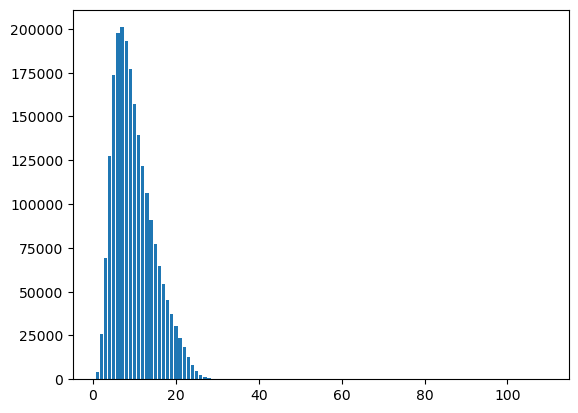

In [73]:
plt.bar(len_count.keys(), len_count.values())